In [1]:
# Multivariate regression and predicting car prices
# p. 149 (or 164 of 415)
# http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls

import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

df.head()





,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [15]:
import statsmodels.api as sm
df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Doors']] 
y = df[['Price']]
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.98e-07
Time:                        10:24:57   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000    2.77e+04    3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000      -0.259      -0.095
Model_ord    -39.0387     39.326     -0.993      0.321    -116.234      38.157
Doors      -1652.9303    402.649     -4.105      0.000   -2443.303    -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X

,Mileage,Model_ord,Doors
0,8221,10,4
1,9135,10,4
2,13196,10,4
3,16342,10,4
4,19832,10,4
...,...,...,...
799,16229,21,4
800,19095,21,4
801,20484,21,4
802,25979,21,4


In [18]:
import statsmodels.api as sm
df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Leather']] 
y = df[['Price']]
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     12.72
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           3.98e-08
Time:                        10:29:22   Log-Likelihood:                -8517.4
No. Observations:                 804   AIC:                         1.704e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.258e+04   1236.261     18.267      0.000    2.02e+04     2.5e+04
Mileage       -0.1733      0.042     -4.158      0.000      -0.255      -0.091
Model_ord    -19.9780     39.364     -0.508      0.612     -97.248      57.292
Leather     3444.5877    765.838      4.498      0.000    1941.299    4947.876
==============================================================================
Omnibus:                      216.858   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.064
Skew:                           1.410   Prob(JB):                    1.76e-116
Kurtosis:                       5.822   Cond. No.                     8.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
y.groupby(df.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749


In [11]:
y.groupby(df.Model_ord).mean()

,Price
Model_ord,
0,24960.948265
1,29047.756011
2,30429.581085
3,30023.924244
4,28184.822515
5,10752.833305
6,20896.373454
7,45022.924436
8,30455.144774


In [19]:
y.groupby(df.Leather).mean()

,Price
Leather,
0,18828.775928
1,22302.232531


In [20]:
import statsmodels.api as sm
df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Doors', 'Leather']] 
y = df[['Price']]
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     13.44
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.32e-10
Time:                        10:57:20   Log-Likelihood:                -8510.0
No. Observations:                 804   AIC:                         1.703e+04
Df Residuals:                     799   BIC:                         1.705e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.829e+04   1919.509     14.739      0.000    2.45e+04    3.21e+04
Mileage       -0.1761      0.041     -4.262      0.000      -0.257      -0.095
Model_ord    -24.9451     39.047     -0.639      0.523    -101.592      51.702
Doors      -1542.8051    399.195     -3.865      0.000   -2326.399    -759.211
Leather     3254.9769    760.836      4.278      0.000    1761.503    4748.451
==============================================================================
Omnibus:                      180.414   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.343
Skew:                           1.248   Prob(JB):                     1.90e-82
Kurtosis:                       5.236   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import statsmodels.api as sm
df['Make_ord'] = pd.Categorical(df.Make).codes
X = df[['Make_ord', 'Mileage', 'Doors','Leather']] 
y = df[['Price']]
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     17.78
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.41e-14
Time:                        11:03:47   Log-Likelihood:                -8501.9
No. Observations:                 804   AIC:                         1.701e+04
Df Residuals:                     799   BIC:                         1.704e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.127e+04   1959.841     15.956      0.000    2.74e+04    3.51e+04
Make_ord   -1043.0178    255.399     -4.084      0.000   -1544.349    -541.686
Mileage       -0.1710      0.041     -4.179      0.000      -0.251      -0.091
Doors      -1774.2951    399.323     -4.443      0.000   -2558.141    -990.449
Leather     3065.1902    752.649      4.073      0.000    1587.787    4542.594
==============================================================================
Omnibus:                      143.410   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.433
Skew:                           1.105   Prob(JB):                     8.36e-54
Kurtosis:                       4.553   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X

,Make_ord,Mileage,Doors,Leather
0,0,8221,4,1
1,0,9135,4,0
2,0,13196,4,0
3,0,16342,4,0
4,0,19832,4,1
...,...,...,...,...
799,5,16229,4,0
800,5,19095,4,0
801,5,20484,4,0
802,5,25979,4,0


In [28]:
y.groupby(df.Make).mean()

,Price
Make,
Buick,20815.113883
Cadillac,40936.335448
Chevrolet,16427.599348
Pontiac,18412.100422
SAAB,29494.704687
Saturn,13978.807560


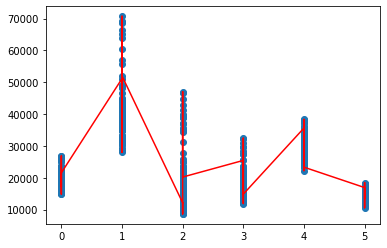

In [30]:
import matplotlib.pyplot as plt
X = df[['Make_ord']] 
plt.scatter(X, y)
plt.plot(X, y, c='r')
plt.show()